In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets

In [2]:
def normal_dist(x , mean , var):
    prob_density = 1 / (np.sqrt(2*np.pi)*var) * np.exp(-0.5*((x-mean)/var)**2)
    return prob_density

def kullback(mu0, var0, mu1, var1):
    return 0.5 * (
        var0 / var1 + (mu1 - mu0)**2 / var1 - 1 + 2 * np.log( np.sqrt(var1 / var0) )
    )

In [3]:
T_s = 100
s = np.linspace(0, 1, T_s)

T_v = 100
v_min = 0
v_max = 8
v = np.linspace(v_min, v_max, T_v)

mu_x1 = 5
var_x1 = 1
mu_x2 = 2.5
var_x2 = 0.5

mu_y1 = 2.5
var_y1 = 0.5
mu_y2 = 5
var_y2 = 1

x1 = normal_dist(v, mu_x1, var_x1)
x2 = normal_dist(v, mu_x2, var_x2)
y1 = normal_dist(v, mu_y1, var_y1)
y2 = normal_dist(v, mu_y2, var_y2)

z1 = x1 * np.log(x1 / y1)
z2 = x2 * np.log(x2 / y2)

pdfs = np.array([z1*(1 - t) + t * z2 for t in s])

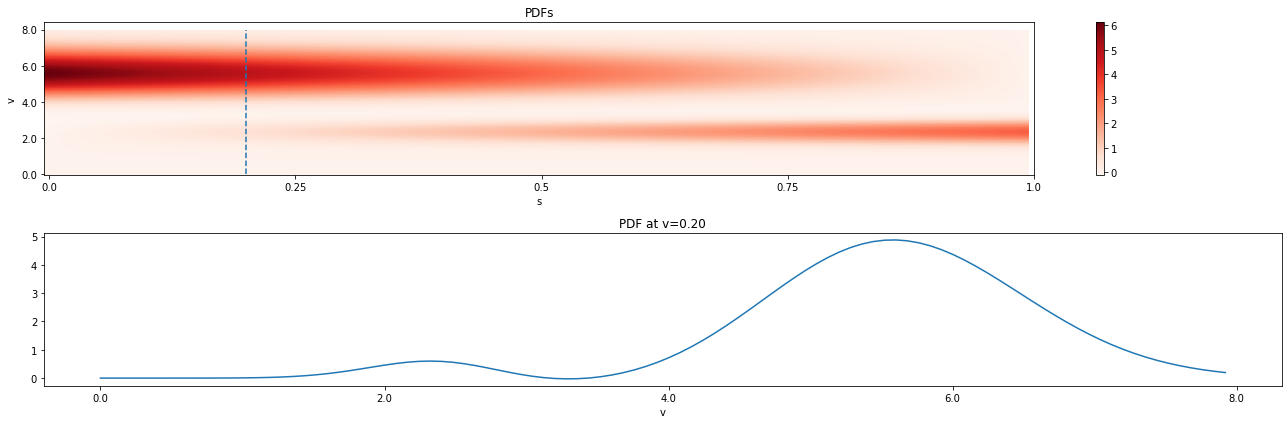

In [4]:
s = 20

plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.title('PDFs')
plt.imshow(pdfs.T, cmap='Reds', aspect='auto', origin='lower')
plt.vlines(s, 0, T_v, colors='tab:blue', ls='dashed')
plt.colorbar()
plt.xlabel('s')
plt.xticks(np.linspace(0,T_s,5), np.linspace(0,1,5))
plt.ylabel('v')
plt.yticks(np.linspace(0,T_v,5), np.linspace(v_min,v_max,5))

plt.subplot(2,1,2)
plt.title('PDF at v={:.2f}'.format(s/T_s))
plt.plot(pdfs[s,:])
plt.xticks(np.linspace(0,T_v,5), np.linspace(v_min,v_max,5))
plt.xlabel('v')

plt.tight_layout()
plt.show()

In [5]:
@widgets.interact(s=(0,T_s-1,1))
def show_pdf(s=20):
    plt.figure(figsize=(18,6))
    plt.subplot(2,1,1)
    plt.title('PDFs')
    plt.imshow(pdfs.T, cmap='Reds', aspect='auto', origin='lower')
    plt.vlines(s, 0, T_v, colors='tab:blue', ls='dashed')
    plt.colorbar()
    plt.xlabel('s')
    plt.xticks(np.linspace(0,T_s,5), np.linspace(0,1,5))
    plt.ylabel('v')
    plt.yticks(np.linspace(0,T_v,5), np.linspace(v_min,v_max,5))

    plt.subplot(2,1,2)
    plt.title('PDF at v={:.2f}'.format(s/T_s))
    plt.plot(pdfs[s,:])
    plt.xticks(np.linspace(0,T_v,5), np.linspace(v_min,v_max,5))
    plt.xlabel('v')
    plt.ylim(0,7)

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=20, description='s', max=99), Output()), _dom_classes=('widget-interact'…

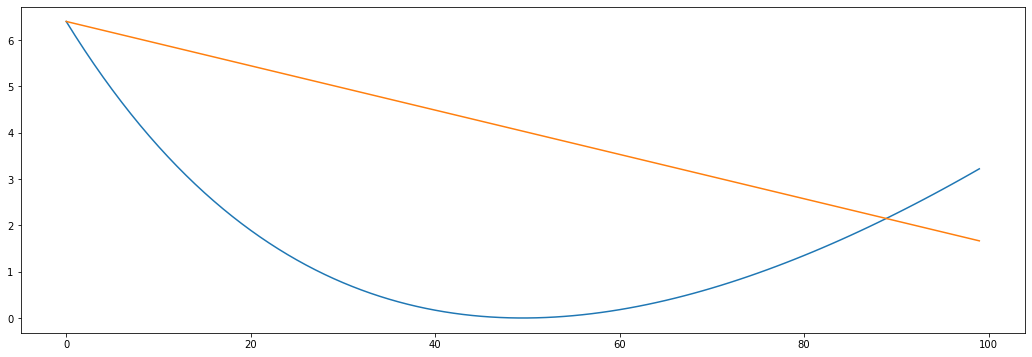

In [45]:
dist_linear = kullback(np.linspace(mu_x1, mu_x2, T_s), np.linspace(var_x1, var_x2, T_s), np.linspace(mu_y1, mu_y2, T_s), np.linspace(var_y1, var_y2, T_s))
dist = np.sum(pdfs, axis=1)
dist /= dist.max()
dist *= dist_linear[0]

plt.figure(figsize=(18,6))
ax = plt.subplot(1,1,1)
plt.plot(dist_linear)
plt.plot(dist)
plt.show()